In [2]:
# Changing logging to critical only, to supress gross output in the import of run_simulation
# Note when calling run_simulation you can set logging_level='DEBUG' which will bring back
# the over-the-top logging :D

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [4]:
from scse.api.simulation import run_simulation;
from IPython.utils import io
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [22]:
# Test running 25 simulations, each with 336 steps (1 week), with 1 through 25 batteries

total_batteries = 25
time_horizon = 336

# Note the simulation reward is the final reward from cum_reward i.e. the final episode reward
simulation_reward = np.array([run_simulation(time_horizon=time_horizon, num_batteries=i)[-1] 
           for i in tqdm(range(total_batteries))])

100%|██████████| 1/1 [00:00<00:00,  1.84it/s]


[-75575]

In [27]:
# Save the rewards for use later

np.save('./saved_reward_arrays/rewards_25_batteries_336_steps', simulation_reward)

In [29]:
# Load rewards for exploration

simulation_reward = np.load('./saved_reward_arrays/rewards_25_batteries_336_steps.npy')

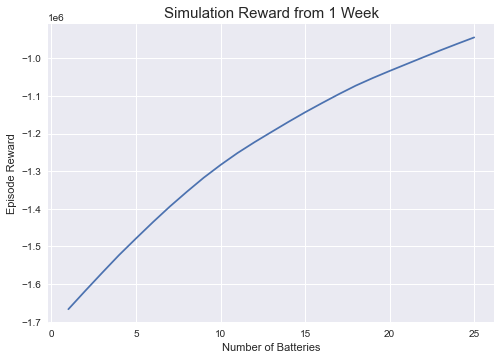

In [69]:
# Plot rewards at end of each similation (episode)

plt.plot(range(1, total_batteries+1), simulation_reward)
plt.title("Simulation Reward from 1 Week", fontsize=)
plt.xlabel('Number of Batteries')
plt.ylabel('Episode Reward')
plt.style.use('seaborn')
plt.show()

In [9]:
# Run the simulation for a month with ten batteries

cum_reward = run_simulation(time_horizon=1344, num_batteries=10)

In [ ]:
# Save the rewards for use later

np.save('./saved_reward_arrays/timestep_rewards_10_batteries_1344_steps', cum_reward)

In [ ]:
# Load for exploration

cum_reward = np.load('./saved_reward_arrays/timestep_rewards_10_batteries_1344_steps')

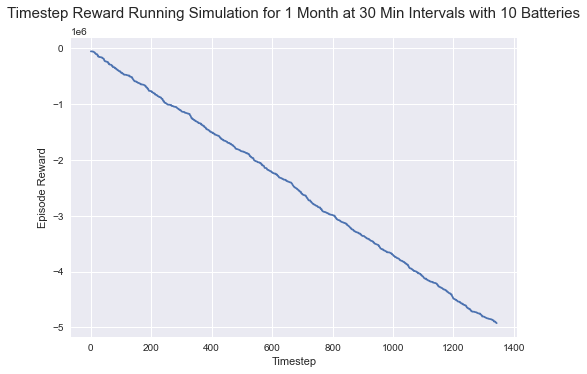

In [12]:
# Plot rewards at each step for each simulation

plt.plot(range(len(cum_reward)), cum_reward)
plt.title("Timestep Reward Running Simulation for 1 Month at 30 Min Intervals with 10 Batteries", fontsize=15, pad=20)
plt.xlabel('Timestep')
plt.ylabel('Episode Reward')
plt.style.use('seaborn')
plt.show()

In [14]:
# Test running the simulation with huge battery capacity

cum_reward = run_simulation(time_horizon=100, num_batteries=100, max_battery_capacity=1000)

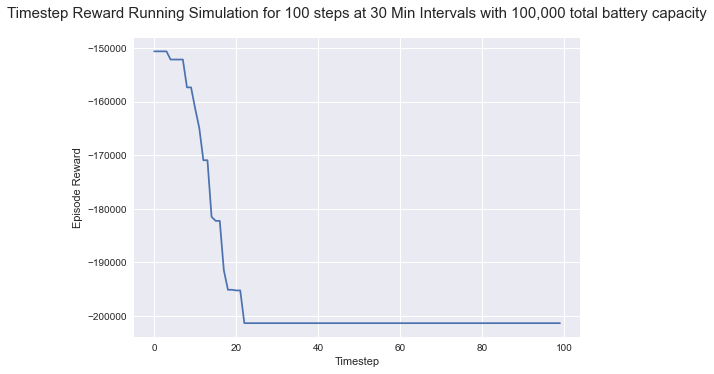

In [16]:
# Plot rewards at each step for each simulation

plt.plot(range(len(cum_reward)), cum_reward)
plt.title("Timestep Reward Running Simulation for 100 steps at 30 Min Intervals with 100,000 total battery capacity", fontsize=15, pad=20)
plt.xlabel('Timestep')
plt.ylabel('Episode Reward')
plt.style.use('seaborn')
plt.show()